In [105]:
%matplotlib inline
import pandas as pd
import numpy as np

In [5]:
conn = pd.read_csv('conn_1.log', sep='\t')

In [6]:
conn.columns = [
    "ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", 
    "id.resp_p", "proto", "service", "duration", "orig_bytes", 
    "resp_bytes", "conn_state", "local_orig", "local_resp", 
    "missed_bytes", "history", "orig_pkts", "orig_ip_bytes", 
    "resp_pkts", "resp_ip_bytes", "tunnel_parents"
]

In [7]:
conn.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
0,1.55138e+09,C5t6Kp1UnQyH7JCC45,192.168.1.193,51360.0,134.209.72.171,80.0,tcp,http,1.87149,151,...,SF,-,-,0.0,ShADadttfF,282.0,15702.0,282.0,412612.0,-
1,1.55138e+09,CRdXqi4p3HG1obs6xl,192.168.1.193,51362.0,134.209.72.171,80.0,tcp,http,2.37637,148,...,SF,-,-,0.0,ShADadttfF,174.0,9600.0,201.0,291562.0,-
2,1.55138e+09,Co7Sfi3KfjPoJwW5Kf,192.168.1.193,51364.0,134.209.72.171,80.0,tcp,-,3.09254,0,...,S0,-,-,0.0,S,6.0,360.0,0.0,0.0,-
3,1.55138e+09,CKaKqD34bwvqLUcID9,192.168.1.193,51364.0,134.209.72.171,80.0,tcp,http,1.35978,148,...,SF,-,-,0.0,ShADadttfF,178.0,9840.0,196.0,284806.0,-
4,1.55138e+09,CFk7Y1SrQmKfgTlp2,192.168.1.193,51366.0,134.209.72.171,80.0,tcp,http,1.95281,151,...,SF,-,-,0.0,ShADadtftF,220.0,11878.0,296.0,434528.0,-


In [9]:
conn['id.orig_h'].value_counts().head(5)

192.168.1.193    5408908
197.13.3.22           53
197.13.3.14           33
197.13.3.6            30
217.136.48.1          11
Name: id.orig_h, dtype: int64

In [10]:
conn['id.resp_h'].value_counts().head(5)

134.209.72.171    1939
192.168.1.193     1652
46.28.109.26        29
37.187.104.44       27
5.1.56.123          27
Name: id.resp_h, dtype: int64

In [39]:
conn_ip = conn[
    (conn['id.resp_h'] == '134.209.72.171') | (conn['id.orig_h'] == '134.209.72.171')
]

In [18]:
conn_ip.shape

(1939, 21)

In [138]:
conn_8081_established = conn[
    (conn['id.resp_p'] == 8081) & ((conn['conn_state'] == 'SF'))
]

In [139]:
conn_8081_established.shape

(6, 21)

In [140]:
conn_8081_established

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
567042,1.55139e+09,CEJEXfqPxKCAB6Dka,192.168.1.193,41870.0,197.99.105.108,8081.0,tcp,http,3.6377,749,...,SF,-,-,0.0,ShADFadfR,16.0,2330.0,10.0,1458.0,-
567043,1.55139e+09,CKeVI5XYd8JMsoPf8,192.168.1.193,41872.0,197.99.105.108,8081.0,tcp,-,0.478229,0,...,SF,-,-,0.0,ShAFf,8.0,432.0,4.0,224.0,-
587495,1.55139e+09,CFIaB849hqqd7FecBa,192.168.1.193,60698.0,197.184.75.218,8081.0,tcp,http,3.62694,749,...,SF,-,-,0.0,ShADFafRdt,16.0,2330.0,10.0,1458.0,-
2116249,1.55139e+09,C9nvA44j6Iyxhm62y8,192.168.1.193,40040.0,197.99.11.39,8081.0,tcp,http,3.65718,749,...,SF,-,-,0.0,ShADFafdtR,16.0,2330.0,10.0,1458.0,-
2397810,1.5514e+09,CJGNeY2BKbMh58WBt7,192.168.1.193,56748.0,197.99.126.113,8081.0,tcp,http,5.06988,749,...,SF,-,-,0.0,ShADFaTfdtR,20.0,4036.0,10.0,1458.0,-
4689112,1.55141e+09,CNDS173NyHcJFSLJA8,192.168.1.193,37930.0,217.230.104.10,8081.0,tcp,http,3.17095,749,...,SF,-,-,0.0,ShADFadfRR,16.0,2330.0,8.0,816.0,-


In [142]:
conn_8081_established['id.resp_h'].unique()

array(['197.99.105.108', '197.184.75.218', '197.99.11.39',
       '197.99.126.113', '217.230.104.10'], dtype=object)

In [144]:
conn_8081_established.ts

567042     1.55139e+09
567043     1.55139e+09
587495     1.55139e+09
2116249    1.55139e+09
2397810     1.5514e+09
4689112    1.55141e+09
Name: ts, dtype: object

In [145]:
time_index_8081 = pd.to_datetime(conn_8081_established.ts, unit='s')

In [146]:
time_index_8081

567042    2019-02-28 20:36:44.151896000
567043    2019-02-28 20:36:47.540473938
587495    2019-02-28 20:38:24.577890158
2116249   2019-02-28 22:42:39.989548922
2397810   2019-02-28 23:05:28.813935995
4689112   2019-03-01 02:11:37.257864951
Name: ts, dtype: datetime64[ns]

In [24]:
conn_ip.index = conn_ip['ts']

In [25]:
conn_ip.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
ts,,,,,,,,,,,,,,,,,,,,,
1.551383e+09,1.55138e+09,C5t6Kp1UnQyH7JCC45,192.168.1.193,51360.0,134.209.72.171,80.0,tcp,http,1.87149,151,...,SF,-,-,0.0,ShADadttfF,282.0,15702.0,282.0,412612.0,-
1.551383e+09,1.55138e+09,CRdXqi4p3HG1obs6xl,192.168.1.193,51362.0,134.209.72.171,80.0,tcp,http,2.37637,148,...,SF,-,-,0.0,ShADadttfF,174.0,9600.0,201.0,291562.0,-
1.551383e+09,1.55138e+09,Co7Sfi3KfjPoJwW5Kf,192.168.1.193,51364.0,134.209.72.171,80.0,tcp,-,3.09254,0,...,S0,-,-,0.0,S,6.0,360.0,0.0,0.0,-
1.551383e+09,1.55138e+09,CKaKqD34bwvqLUcID9,192.168.1.193,51364.0,134.209.72.171,80.0,tcp,http,1.35978,148,...,SF,-,-,0.0,ShADadttfF,178.0,9840.0,196.0,284806.0,-
1.551383e+09,1.55138e+09,CFk7Y1SrQmKfgTlp2,192.168.1.193,51366.0,134.209.72.171,80.0,tcp,http,1.95281,151,...,SF,-,-,0.0,ShADadtftF,220.0,11878.0,296.0,434528.0,-


In [27]:
conn_ip['id.resp_p'].value_counts()

4554.0    1923
80.0        16
Name: id.resp_p, dtype: int64

In [32]:
conn_ip_4554 = conn_ip[conn_ip['id.resp_p'] == 4554]

In [91]:
time_index = pd.to_datetime(conn_ip_4554.index, unit='s')

In [92]:
time_df = pd.DataFrame(
    {
        'num': [1] * len(time_index), 
        'orig_bytes': list(conn_ip_4554['orig_ip_bytes']),
        'resp_bytes': list(conn_ip_4554['resp_ip_bytes'])
    }, 
    index=time_index)

In [93]:
min(time_df.index), max(time_df.index)


(Timestamp('2019-02-28 19:50:48.195210934'),
 Timestamp('2019-03-01 03:10:07.222966909'))

In [94]:
time_df.head()

,num,orig_bytes,resp_bytes
ts,,,
2019-02-28 19:50:48.195210934,1,360.0,0.0
2019-02-28 19:50:55.380089045,1,120.0,0.0
2019-02-28 19:51:03.940171003,1,120.0,0.0
2019-02-28 19:51:20.579873085,1,120.0,0.0
2019-02-28 19:51:38.226760864,1,678.0,510.0


In [95]:
def get_sample_group_by_s(time_df, num_s=5, num_sample=5000, func=sum):
    pd_offset_freq = f"{num_s}S"
    group_df = time_df.groupby(pd.TimeGrouper(pd_offset_freq))
    
    freq_feature = group_df['num'].apply(func)
    orig_bytes_feature = group_df['orig_bytes'].apply(func)
    resp_bytes_feature = group_df['resp_bytes'].apply(func)
    
    result = pd.concat([freq_feature, orig_bytes_feature, resp_bytes_feature], axis=1)
    if num_sample:
        result_sample = result.sample(num_sample).sort_index()
    else:
        result_sample = result.sort_index()
    return result_sample

In [96]:
result = get_sample_group_by_s(time_df, num_s=1, num_sample=None, func=sum)

/Users/alperovich/miniconda3/envs/anomaly_detection/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
result.head()

,num,orig_bytes,resp_bytes
ts,,,
2019-02-28 19:50:48,1,360.0,0.0
2019-02-28 19:50:49,0,0.0,0.0
2019-02-28 19:50:50,0,0.0,0.0
2019-02-28 19:50:51,1,93758.0,102154.0
2019-02-28 19:50:52,0,0.0,0.0


In [98]:
result.describe()

,num,orig_bytes,resp_bytes
count,26360.000000,26360.000000,26360.000000
mean,0.072951,39.109712,27.683536
std,0.260062,593.738497,638.212608
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,93758.000000,102154.000000


In [108]:
result_log = result[['orig_bytes', 'resp_bytes']].apply(np.log)

In [113]:
result_log = result_log.replace(-np.inf, 0)

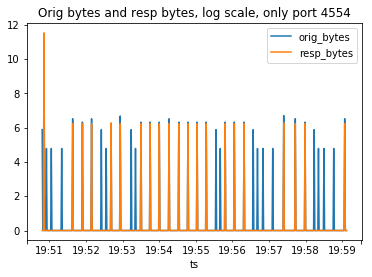

In [119]:
result_log.head(500).plot.line(title='Orig bytes and resp bytes, log scale, only port 4554')

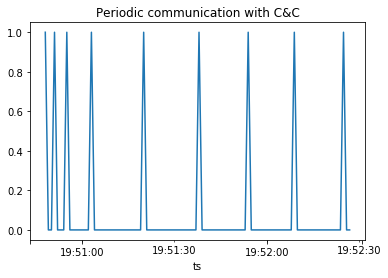

In [124]:
result.num.head(100).plot.line(title='Periodic communication with C&C')

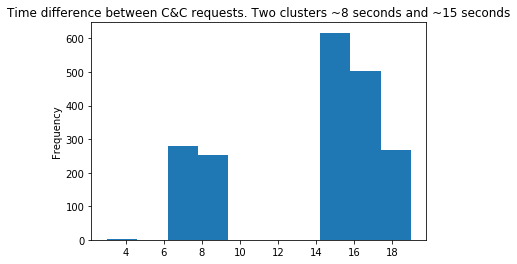

In [175]:
time_diff = (
    result.num[result.num == 1]
        .reset_index()
        .ts.diff(1)
)

time_diff.apply(lambda x: x.seconds).plot.hist(title='Time difference between C&C requests. Two clusters ~8 seconds and ~15 seconds')


In [176]:
len(time_diff)

1923